In [1]:
from PIL import Image
from numpy import *
from pylab import *
import harris

In [5]:
def plot_matches_dst(im1, im2, locs1, locs2, matchscores, show_below=True, dst=10000):
    """ Show a figure with lines joining the accepted matches
    inpu: im1, im2 (images as arrays), locs1, locs2 (feature location),
    matchscores (as output from 'match()'),
    show_below (if images should be shown below matches). """

    im3 = harris.appendimages(im1, im2)
    if show_below:
        im3 = vstack((im3, im3))

    imshow(im3)

    cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        d = (locs1[i][1]-locs2[m][1])**2 + (locs1[i][0]-locs2[m][0])**2
        if (m>0 and d<dst**2):
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
    axis('off')

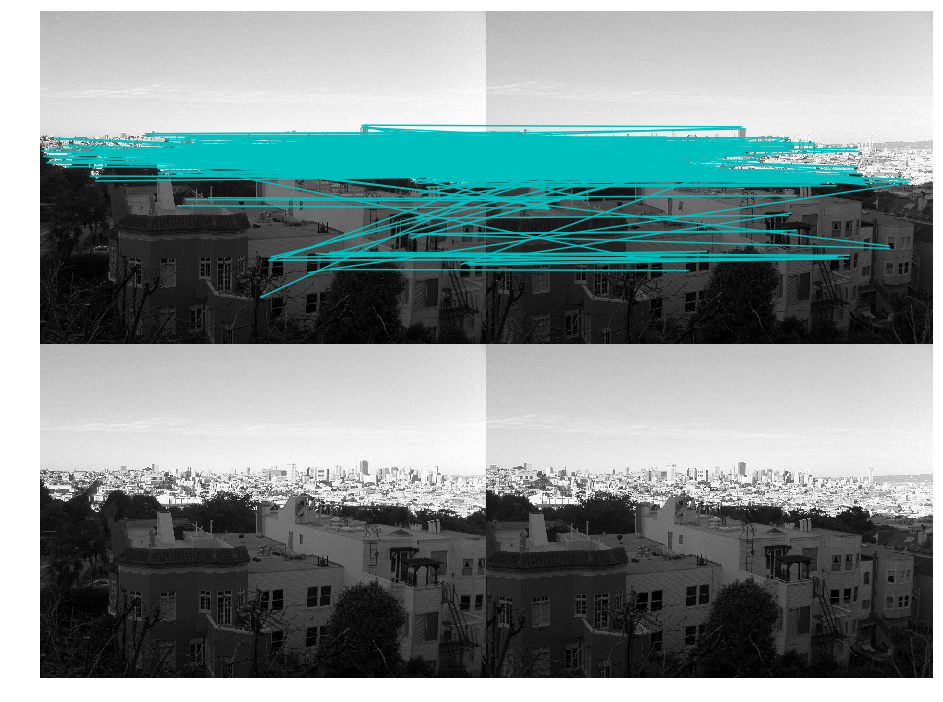

In [6]:
im1 = array(Image.open('sf_view1.jpg').convert('L'))
im2 = array(Image.open('sf_view2.jpg').convert('L'))
wid = 5
harrisim = harris.compute_harris_response(im1, 5)
filtered_coords1= harris.get_harris_points(harrisim, wid+1)
d1 = harris.get_descriptors(im1, filtered_coords1, wid)
harrisim = harris.compute_harris_response(im2, 5)
filtered_coords2= harris.get_harris_points(harrisim, wid+1)
d2 = harris.get_descriptors(im2, filtered_coords2, wid)
matches = harris.match_twosided(d1, d2)
figure(figsize=(16, 16))
gray()
plot_matches_dst(im1, im2, filtered_coords1, filtered_coords2, matches)
show()

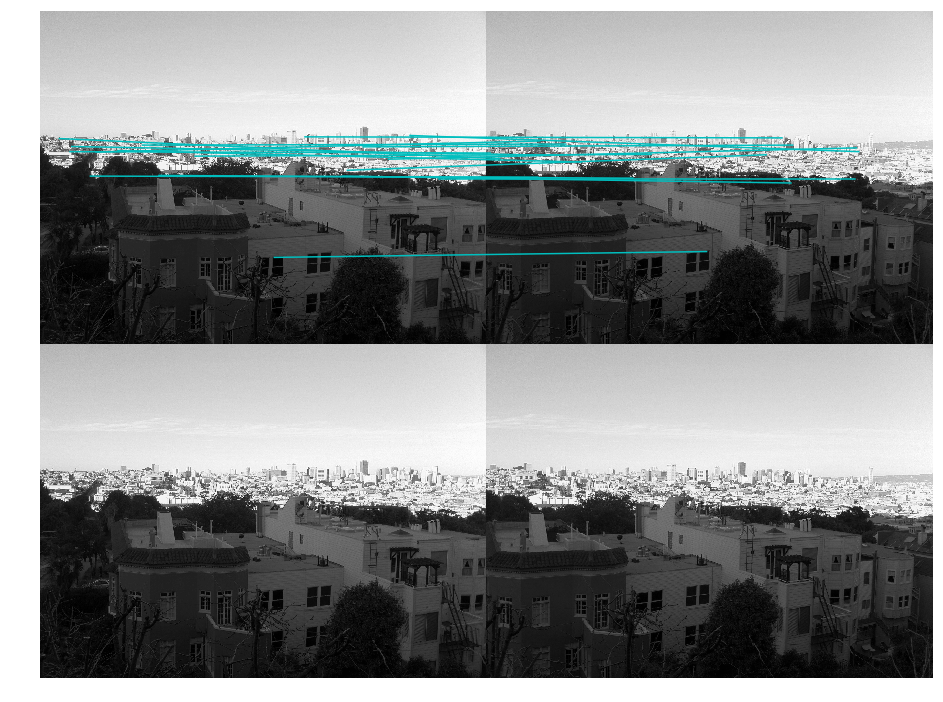

In [18]:
figure(figsize=(16, 16))
gray()
plot_matches_dst(im1, im2, filtered_coords1, filtered_coords2, matches, True, 100)
show()